<a href="https://colab.research.google.com/github/anilmala/Cnn-project/blob/main/Copy_of_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/contentdrive')

Mounted at /content/contentdrive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,Input
from keras.preprocessing.image import load_img,img_to_array
from keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/contentdrive/MyDrive/dataset/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/contentdrive/MyDrive/dataset/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/contentdrive/MyDrive/dataset/Datasets/Train*')
len(folders)

1

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-66-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
2/2 [==============================] - 29s 17s/step - loss: 0.8849 - accuracy: 0.6719 - val_loss: 2.2119 - val_accuracy: 0.4138
Epoch 2/20
2/2 [==============================] - 24s 18s/step - loss: 0.9841 - accuracy: 0.6406 - val_loss: 1.2274 - val_accuracy: 0.5517
Epoch 3/20
2/2 [==============================] - 25s 18s/step - loss: 0.6525 - accuracy: 0.7344 - val_loss: 1.2761 - val_accuracy: 0.5862
Epoch 4/20
2/2 [==============================] - 25s 16s/step - loss: 0.8857 - accuracy: 0.6406 - val_loss: 1.0252 - val_accuracy: 0.6207
Epoch 5/20
2/2 [==============================] - 33s 26s/step - loss: 0.4685 - accuracy: 0.8438 - val_loss: 1.6164 - val_accuracy: 0.4483
Epoch 6/20
2/2 [==============================] - 33s 25s/step - loss: 0.8123 - accuracy: 0.7031 - val_loss: 1.4687 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 21s 16s/step - loss: 0.5287 - accuracy: 0.8125 - val_loss: 0.9852 - val_accuracy: 0.6207
Epoch 8/20
2/2 [===========

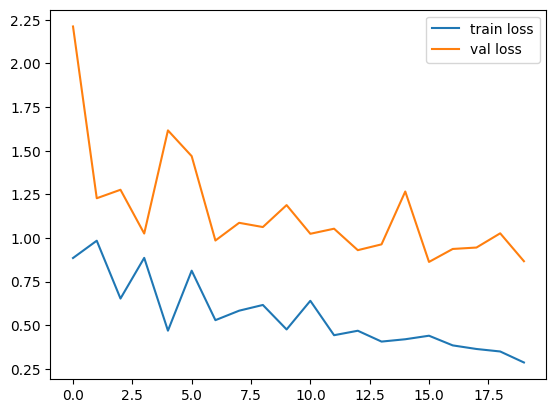

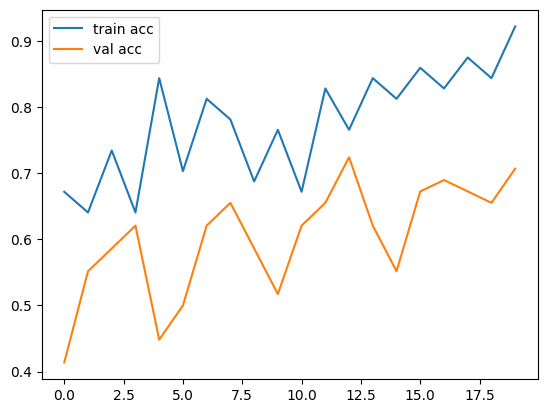

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet502.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 12s 4s/step


array([[3.21792977e-05, 2.28124787e-03, 9.97686625e-01],
       [4.09464873e-02, 8.11161995e-01, 1.47891447e-01],
       [4.40898128e-02, 6.08537495e-01, 3.47372770e-01],
       [1.00382842e-01, 4.41219240e-01, 4.58397865e-01],
       [8.38330865e-01, 1.28416009e-02, 1.48827478e-01],
       [2.39471138e-01, 4.41377491e-01, 3.19151372e-01],
       [9.12502259e-02, 8.13423038e-01, 9.53267887e-02],
       [1.19346708e-01, 6.40855253e-01, 2.39797994e-01],
       [4.98174205e-02, 7.59681106e-01, 1.90501437e-01],
       [1.69095248e-01, 3.56363063e-03, 8.27341139e-01],
       [9.37536120e-01, 4.55844402e-02, 1.68794803e-02],
       [1.38296215e-02, 9.53006625e-01, 3.31636593e-02],
       [9.32015553e-02, 2.97226608e-01, 6.09571815e-01],
       [6.92446589e-01, 2.69817293e-01, 3.77360955e-02],
       [1.09677920e-02, 5.20090103e-01, 4.68942106e-01],
       [9.68048692e-01, 2.01862063e-02, 1.17650786e-02],
       [2.46570691e-01, 5.79550862e-01, 1.73878476e-01],
       [6.90409318e-02, 7.37573

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet502.h5')

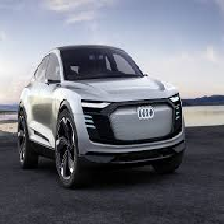

In [ ]:
img=image.load_img("/content/contentdrive/MyDrive/dataset/Datasets/Test/audi/22.jpg",target_size=(224,224))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[160., 170., 197.],
        [160., 170., 197.],
        [159., 169., 196.],
        ...,
        [158., 164., 190.],
        [158., 162., 187.],
        [156., 160., 185.]],

       [[159., 169., 196.],
        [159., 169., 196.],
        [158., 168., 195.],
        ...,
        [157., 163., 189.],
        [158., 162., 187.],
        [156., 160., 185.]],

       [[159., 169., 196.],
        [159., 169., 196.],
        [158., 168., 195.],
        ...,
        [157., 163., 189.],
        [158., 162., 187.],
        [156., 160., 185.]],

       ...,

       [[ 53.,  53.,  61.],
        [ 54.,  54.,  62.],
        [ 58.,  58.,  66.],
        ...,
        [ 41.,  41.,  49.],
        [ 44.,  44.,  52.],
        [ 46.,  46.,  54.]],

       [[ 53.,  53.,  61.],
        [ 54.,  54.,  62.],
        [ 58.,  58.,  66.],
        ...,
        [ 41.,  41.,  49.],
        [ 44.,  44.,  52.],
        [ 46.,  46.,  54.]],

       [[ 54.,  54.,  62.],
        [ 56.,  56.,  64.],
        [ 59.,  

In [ ]:
x=x/255
x

array([[[0.627451  , 0.6666667 , 0.77254903],
        [0.627451  , 0.6666667 , 0.77254903],
        [0.62352943, 0.6627451 , 0.76862746],
        ...,
        [0.61960787, 0.6431373 , 0.74509805],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       [[0.62352943, 0.6627451 , 0.76862746],
        [0.62352943, 0.6627451 , 0.76862746],
        [0.61960787, 0.65882355, 0.7647059 ],
        ...,
        [0.6156863 , 0.6392157 , 0.7411765 ],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       [[0.62352943, 0.6627451 , 0.76862746],
        [0.62352943, 0.6627451 , 0.76862746],
        [0.61960787, 0.65882355, 0.7647059 ],
        ...,
        [0.6156863 , 0.6392157 , 0.7411765 ],
        [0.61960787, 0.63529414, 0.73333335],
        [0.6117647 , 0.627451  , 0.7254902 ]],

       ...,

       [[0.20784314, 0.20784314, 0.23921569],
        [0.21176471, 0.21176471, 0.24313726],
        [0.22745098, 0

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)
if a==0:
  print("audi")
elif a==1:
  print("lamborgini")
else:
  print("mercedes")


1/1 [==============================] - 2s 2s/step
[2]
mercedes
